In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
sys.path.insert(0, project_root)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps

from scripts.utils import plot_3d_realizations_enhanced, npy_to_hard_data, save_simulations_to_npy

In [3]:
from scripts.patches import apply_all_pyvista_patches, apply_all_numpy_patches

apply_all_pyvista_patches()
apply_all_numpy_patches()

🔧 Applying PyVista compatibility patches...
✅ MPSlib plotting functions patched to use PyVista ImageData instead of deprecated UniformGrid
✅ MPSlib plot.plot() function patched to use PyVista ImageData
✅ All PyVista patches applied successfully!
🔧 Applying NumPy compatibility patches...
❌ Error patching mpslib: type object 'mpslib' has no attribute 'mpslib'
✅ Successfully replaced np.NaN with np.nan globally
❌ Some NumPy patches failed to apply


False

## Choose training image

2025-09-15 13:07:41.735 (   1.705s) [    7BB1630F4740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=
/home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


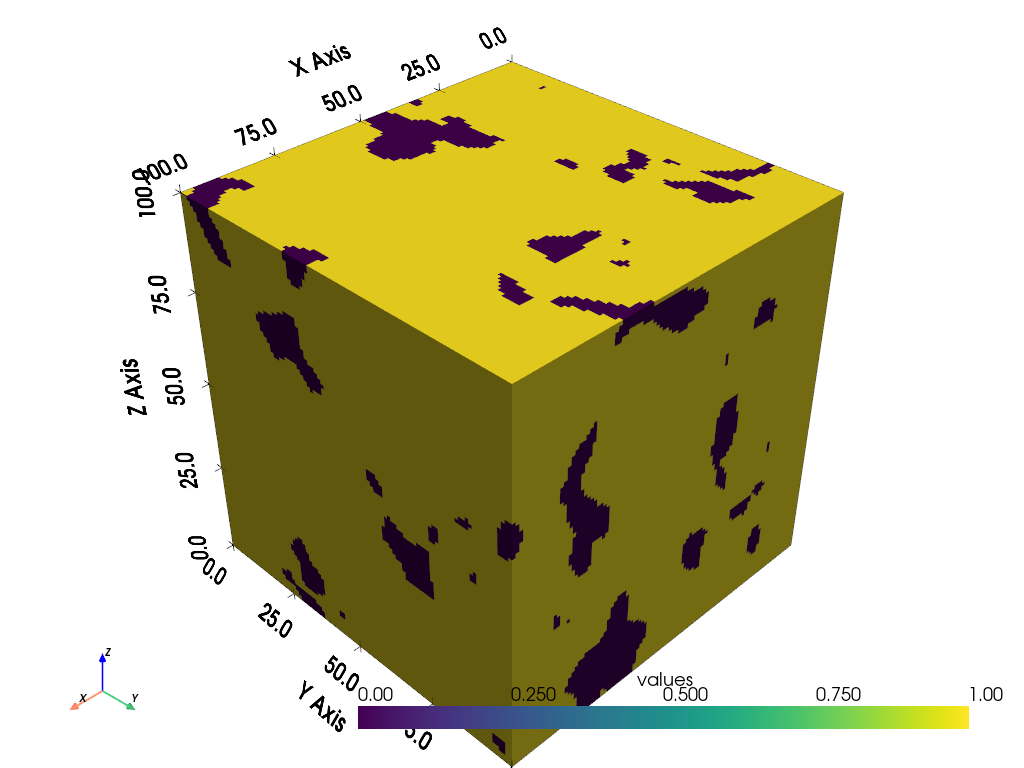

In [4]:
idx = 0
downsample_factor = 1
cube_length = 100

path = f"../../../data/3d/downsample_factor_{downsample_factor}_{cube_length}/Parker_binary_{idx}"
path_eas = path + ".dat"
data_eas = mps.eas.read(filename=path_eas)
data_array = np.load(path + ".npy")
# data_transformed_array = np.load(path + "_transformed.npy")
mps.plot.plot(np.squeeze(data_array), slice=0)

# Choose hard data image


In [5]:
# Select hard data parameters
idx = 4  # Choose Parker binary hard data image #4
downsample_factor = 4

# Construct file path for the hard data
hard_path = f"../../../data/3d/downsample_factor_{downsample_factor}_{cube_length}/Parker_binary_{idx}"

# Load hard data in EAS format (for MPSlib compatibility)
hard_path_eas = hard_path + ".dat"
hard_data_eas = mps.eas.read(filename=hard_path_eas)
hard_data_array = np.load(hard_path + ".npy")

# Load processed hard data arrays
hard_data_transformed_array = np.load(hard_path + "_transformed.npy")  # Transformed version for visualization
hard_data = npy_to_hard_data(hard_path + "_transformed.npy", downsample_factor=downsample_factor)  # Convert numpy array to MPSlib hard data format

📊 3D array detected, using all 25 Z layers
✅ Converted ../../../data/3d/downsample_factor_4_100/Parker_binary_4_transformed.npy to hard data format
   Original array shape: (25, 25, 25)
   Processed array shape: (25, 25, 25)
   Hard data points: 15625
   Value range: [0.00, 1.00]
   Coordinate scaling factor: 4
   Scaled coordinate range: X[0, 96.0], Y[0, 96.0], Z[0, 96.0]


/home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


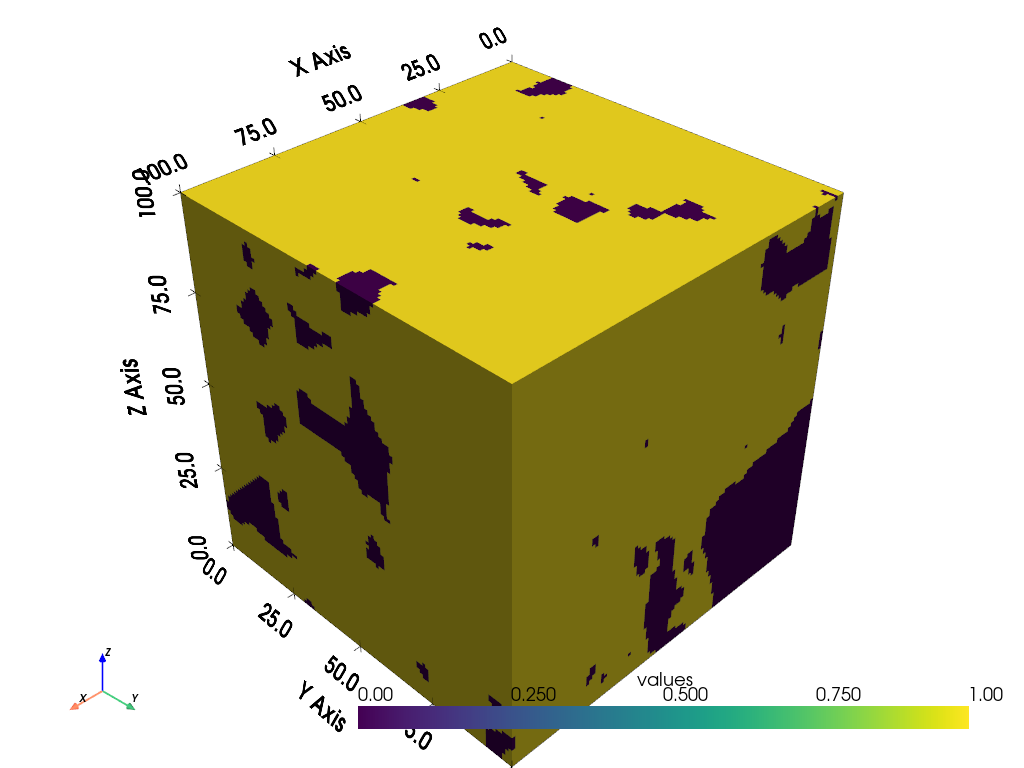

In [6]:
mps.plot.plot(np.squeeze(hard_data_array), slice=0)

/home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


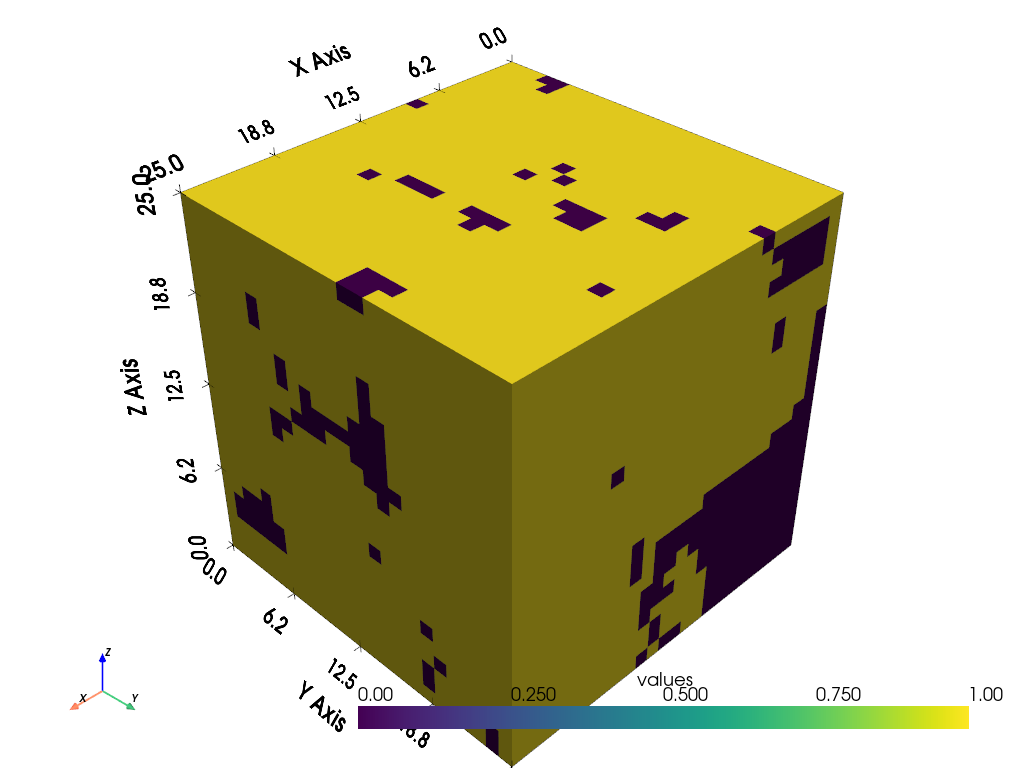

In [7]:
mps.plot.plot(np.squeeze(hard_data_transformed_array), slice=0)

## Setup MPSLib
First one need to initialize an instance of the mpslib object. 


In [8]:
simulation_grid_size = [100, 100, 100]  # Output shape
template_size = [5, 5, 5]

In [9]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib();

# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=simulation_grid_size)

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=25
O.par['n_real']=4
O.par['n_threads']=26
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array(simulation_grid_size)
O.par["template_size"]=np.array(template_size)

# Set the training image and the hard data
O.par["ti_fnam"] = path_eas
O.par["hard_data_fnam"] = hard_path_eas
O.d_hard = hard_data

Using mps_genesim installed in /home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/mpslib/bin (scikit-mps in /home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/mpslib/mpslib.py)
Using mps_snesim_tree installed in /home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/mpslib/bin (scikit-mps in /home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/mpslib/mpslib.py)


In [10]:
# All adjustable parameters for the specifric chosen MPSlib algorithm are
O.par

{'n_real': 4,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': '../../../data/3d/downsample_factor_1_100/Parker_binary_0.dat',
 'simulation_grid_size': array([100, 100, 100]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': '../../../data/3d/downsample_factor_4_100/Parker_binary_4.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 26,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([5, 5, 5]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 25}

## Run MPSlib

The chosen MPSlib algorithm is run using a single thread by executing 

    O.run()
    
and using multiple threads by executing

    O.run_parallel()


In [11]:
#O.run()
O.run_parallel()

parallel: Using 4 of max 26 threads


## Plot some realizations using matplotlib

In [20]:
def save_simulations_to_np(O, folder):
    """
    Save all simulations from O.reals as .npy files into a given folder.

    Parameters
    ----------
    O : mpslib.mpslib
        An MPS simulation object with O.reals containing NumPy arrays.
    folder : str
        Path to the output directory. Will be created if it doesn't exist.
    """
    # Ensure output folder exists
    os.makedirs(folder, exist_ok=True)

    # Loop through each realization and save as .npy
    for i, sim in enumerate(O.sim):
        filename = os.path.join(folder, f"sim{i:03d}.npy")
        np.save(filename, sim)

    print(f"✔ Saved {len(O.sim)} realizations to '{folder}'")

✔ Saved 4 realizations to '../simulated_data/'


/home/lcadame/miniconda3/envs/mps_env/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


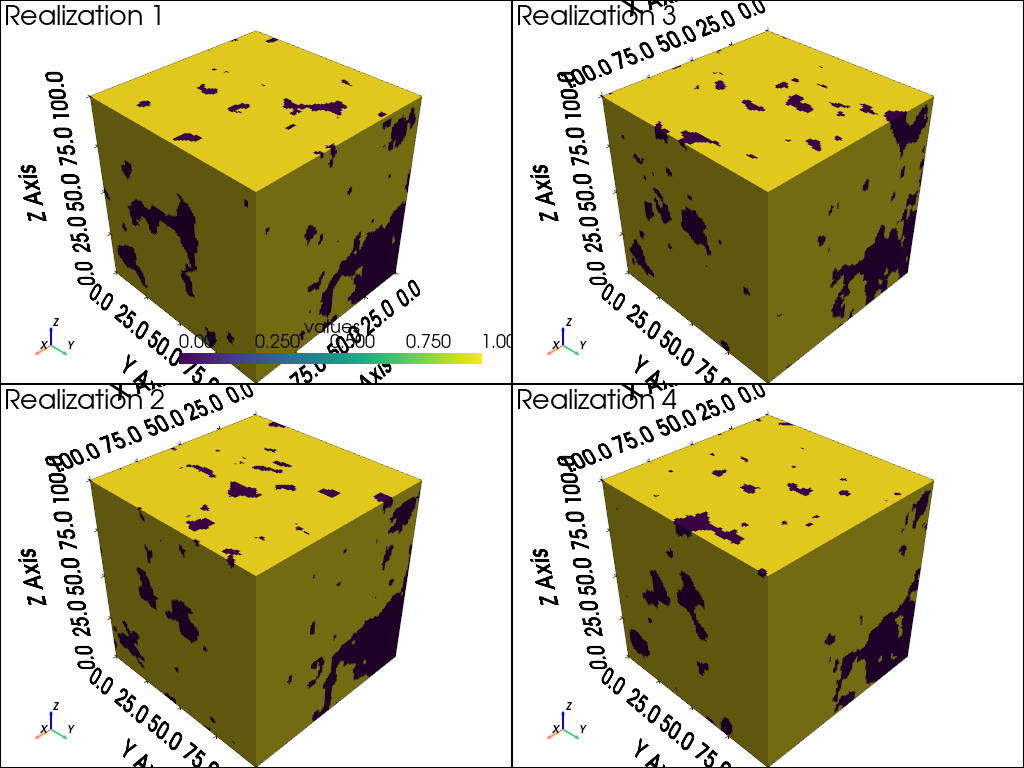

In [21]:
save_simulations_to_np(O=O, folder="../simulated_data/")
plot_3d_realizations_enhanced(O=O, n_realizations=4, slice_mode='full')